# Part 0: Import 套件¶

In [1]:
#下載資料套件
import urllib3
from bs4 import BeautifulSoup

#資料處理套件
import pandas as pd
from datetime import datetime, date

#畫圖套件
import matplotlib.pyplot as plt
%matplotlib inline

#from plotly.subplots import make_subplots
#import plotly.graph_objects as go

# Part 1: 下載期交所 臺指選擇權 每日交易行情
### 股海小英雄youtube影片：[【Python 爬蟲】台指選擇權Put/Call比免費下載 (上)｜股市多空頭趨勢預測](https://youtu.be/RqodmAWC8EE)

### 資料來源：[期交所 臺指選擇權 每日交易行情](https://www.taifex.com.tw/cht/3/dlOptDailyMarketView)
注意:查詢區間不可超過30日

用urllib3下載選擇權每日交易行情資料


In [2]:
http = urllib3.PoolManager()
url = "https://www.taifex.com.tw/cht/3/dlOptDataDown"
res = http.request(
     'POST',
      url,
      fields={
         'down_type': 1,
         'commodity_id': 'TXO',
         'queryStartDate': '2022/08/01',
         'queryEndDate': '2022/08/08'
      }
 )

html_doc = res.data
html_doc

b'\xa5\xe6\xa9\xf6\xa4\xe9\xb4\xc1,\xab\xb4\xac\xf9,\xa8\xec\xb4\xc1\xa4\xeb\xa5\xf7(\xb6g\xa7O),\xbci\xac\xf9\xbb\xf9,\xb6R\xbd\xe6\xc5v,\xb6}\xbdL\xbb\xf9,\xb3\xcc\xb0\xaa\xbb\xf9,\xb3\xcc\xa7C\xbb\xf9,\xa6\xac\xbdL\xbb\xf9,\xa6\xa8\xa5\xe6\xb6q,\xb5\xb2\xba\xe2\xbb\xf9,\xa5\xbc\xa8R\xbeP\xab\xb4\xac\xf9\xbc\xc6,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xb6R\xbb\xf9,\xb3\xcc\xab\xe1\xb3\xcc\xa8\xce\xbd\xe6\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xb0\xaa\xbb\xf9,\xbe\xfa\xa5v\xb3\xcc\xa7C\xbb\xf9,\xacO\xa7_\xa6]\xb0T\xae\xa7\xad\xb1\xbc\xc8\xb0\xb1\xa5\xe6\xa9\xf6,\xa5\xe6\xa9\xf6\xae\xc9\xacq,\xba\xa6\xb6^\xbb\xf9,\xba\xa6\xb6^%\r\n2022/08/01,TXO,202208W1,13300.0000,\xb6R\xc5v,-,-,-,-,0,1640,0,-,-,-,-,,\xa4@\xaf\xeb,-,-,\r\n2022/08/01,TXO,202208W1,13300.0000,\xb6R\xc5v,-,-,-,-,0,-,-,-,-,-,-,,\xbdL\xab\xe1,-,-,\r\n2022/08/01,TXO,202208W1,13300.0000,\xbd\xe6\xc5v,0.3,0.3,0.3,0.3,63,0.3,1421,0.2,0.9,2.4,0.3,,\xa4@\xaf\xeb,-0.1,-25%,\r\n2022/08/01,TXO,202208W1,13300.0000,\xbd\xe6\xc5v,-,-,-,-,0,-,-,-,-,-,-

用BeautifulSoup解析資料

In [3]:
soup = BeautifulSoup(html_doc, 'html.parser')
soup

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,1640,0,-,-,-,-,,一般,-,-,
2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2022/08/01,TXO,202208W1,13300.0000,賣權,0.3,0.3,0.3,0.3,63,0.3,1421,0.2,0.9,2.4,0.3,,一般,-0.1,-25%,
2022/08/01,TXO,202208W1,13300.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2022/08/01,TXO,202208W1,13400.0000,買權,-,-,-,-,0,1540,0,-,-,-,-,,一般,-,-,
2022/08/01,TXO,202208W1,13400.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2022/08/01,TXO,202208W1,13400.0000,賣權,0.3,0.3,0.3,0.3,80,0.3,203,0.2,0.7,2.7,0.3,,一般,-0.1,-25%,
2022/08/01,TXO,202208W1,13400.0000,賣權,0.7,0.7,0.6,0.7,12,-,-,0.5,0.8,2.7,0.4,,盤後,0.3,75%,
2022/08/01,TXO,202208W1,13500.0000,買權,-,-,-,-,0,1440,0,-,-,-,-,,一般,-,-,
2022/08/01,TXO,202208W1,13500.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,
2022/08/01,TXO,202208W1,13500.0000,賣權,0.4,0.8,0.4,0.4,1029,0.3,1192,0.2,0.7,3.5,0.4,,一般,0,0.00%,
2022/08/01,TXO,202208W

把資料依行數切割

In [5]:
soup_str = str(soup)
lines = soup_str.split('\r\n')

for i in range(5):
    print(lines[i])
    print()

交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%

2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,1640,0,-,-,-,-,,一般,-,-,

2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,

2022/08/01,TXO,202208W1,13300.0000,賣權,0.3,0.3,0.3,0.3,63,0.3,1421,0.2,0.9,2.4,0.3,,一般,-0.1,-25%,

2022/08/01,TXO,202208W1,13300.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-,



把下載的選擇權每日交易行情資料存入dataframe內

In [14]:
# 新增空的dataframe,定義欄位名稱
df = pd.DataFrame(columns = lines[0].split(','))

# 把選擇權資料一行一行寫入dataframe內
for i in range(1, len(lines) - 1):
    list_ = lines[i].split(',')[:-1]
    df_length = len(df)
    df.loc[df_length] = list_

#顯示dataframe前20行的資料    
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
0,2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,1640,0,-,-,-,-,,一般,-,-
1,2022/08/01,TXO,202208W1,13300.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
2,2022/08/01,TXO,202208W1,13300.0000,賣權,0.3,0.3,0.3,0.3,63,0.3,1421,0.2,0.9,2.4,0.3,,一般,-0.1,-25%
3,2022/08/01,TXO,202208W1,13300.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
4,2022/08/01,TXO,202208W1,13400.0000,買權,-,-,-,-,0,1540,0,-,-,-,-,,一般,-,-
5,2022/08/01,TXO,202208W1,13400.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
6,2022/08/01,TXO,202208W1,13400.0000,賣權,0.3,0.3,0.3,0.3,80,0.3,203,0.2,0.7,2.7,0.3,,一般,-0.1,-25%
7,2022/08/01,TXO,202208W1,13400.0000,賣權,0.7,0.7,0.6,0.7,12,-,-,0.5,0.8,2.7,0.4,,盤後,0.3,75%
8,2022/08/01,TXO,202208W1,13500.0000,買權,-,-,-,-,0,1440,0,-,-,-,-,,一般,-,-
9,2022/08/01,TXO,202208W1,13500.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-


# Part 2: 將下載的臺指選擇權 每日交易行情 另存csv檔到本機

In [7]:
#from google.colab import files
df.to_csv('options.csv',encoding='utf_8_sig') 
#files.download('options.csv')

#Part 3: 畫出臺指選擇權每日交易行情
### 資料轉型：把日期從字串(string)換成時間(datetime)/浮點數(float)

In [15]:
# 資料轉型
for col in [0, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for row in range(df.shape[0]):
        # 把"日期"從字串(string)換成時間(datetime)
        if col == 0:
            day = df.iloc[row,0].split('/')
            df.iloc[row, 0] = datetime(int(day[0]), int(day[1]), int(day[2]))  
        # 把字串(string)換成浮點數(float): "履約價", "開盤價", "最高價", "最低價", "收盤價", "成交量", "結算價", "未沖銷契約數", "最後最佳買價", "最後最佳賣價", "歷史最高價", "歷史最低價" 
        elif col != 0 and df.iloc[row, col] != '-':
            df.iloc[row, col] = float(df.iloc[row,col])

### 資料篩選：取出臺指選擇權202108W2的資料

In [16]:
df.head(20)

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
0,2022-08-01 00:00:00,TXO,202208W1,13300.0,買權,-,-,-,-,0.0,1640.0,0.0,-,-,-,-,,一般,-,-
1,2022-08-01 00:00:00,TXO,202208W1,13300.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
2,2022-08-01 00:00:00,TXO,202208W1,13300.0,賣權,0.3,0.3,0.3,0.3,63.0,0.3,1421.0,0.2,0.9,2.4,0.3,,一般,-0.1,-25%
3,2022-08-01 00:00:00,TXO,202208W1,13300.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4,2022-08-01 00:00:00,TXO,202208W1,13400.0,買權,-,-,-,-,0.0,1540.0,0.0,-,-,-,-,,一般,-,-
5,2022-08-01 00:00:00,TXO,202208W1,13400.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
6,2022-08-01 00:00:00,TXO,202208W1,13400.0,賣權,0.3,0.3,0.3,0.3,80.0,0.3,203.0,0.2,0.7,2.7,0.3,,一般,-0.1,-25%
7,2022-08-01 00:00:00,TXO,202208W1,13400.0,賣權,0.7,0.7,0.6,0.7,12.0,-,-,0.5,0.8,2.7,0.4,,盤後,0.3,75%
8,2022-08-01 00:00:00,TXO,202208W1,13500.0,買權,-,-,-,-,0.0,1440.0,0.0,-,-,-,-,,一般,-,-
9,2022-08-01 00:00:00,TXO,202208W1,13500.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-


In [17]:
df.describe()

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
count,8522,8522,8522,8522.0,8522,8522,8522,8522,8522,8522.0,8522,8522,8522,8522,8522,8522,8522,8522,8522,8522
unique,6,1,7,108.0,2,724,746,708,710,1093.0,1132,1035,705,736,413,463,1,2,549,1957
top,2022-08-03 00:00:00,TXO,202209,14600.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,一般,-,-
freq,1498,8522,2088,146.0,4261,5522,5522,5522,5522,5522.0,4208,4208,5584,5699,5522,5522,8522,4314,5522,5551


In [18]:
df['到期月份(週別)'].unique()

array(['202208W1', '202208  ', '202209  ', '202210  ', '202212  ',
       '202303  ', '202208W2'], dtype=object)


選到期月份(週別)是'202108W2'的資料

In [38]:
df.loc[df['到期月份(週別)'] == '202208W1']

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
0,2022-08-01 00:00:00,TXO,202208W1,13300.0,買權,-,-,-,-,0.0,1640.0,0.0,-,-,-,-,,一般,-,-
1,2022-08-01 00:00:00,TXO,202208W1,13300.0,買權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
2,2022-08-01 00:00:00,TXO,202208W1,13300.0,賣權,0.3,0.3,0.3,0.3,63.0,0.3,1421.0,0.2,0.9,2.4,0.3,,一般,-0.1,-25%
3,2022-08-01 00:00:00,TXO,202208W1,13300.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
4,2022-08-01 00:00:00,TXO,202208W1,13400.0,買權,-,-,-,-,0.0,1540.0,0.0,-,-,-,-,,一般,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,2022-08-03 00:00:00,TXO,202208W1,16500.0,賣權,-,-,-,-,0.0,-,-,-,-,-,-,,盤後,-,-
2998,2022-08-03 00:00:00,TXO,202208W1,16600.0,買權,-,-,-,-,0.0,0.0,1.0,-,-,-,-,,一般,-,-
2999,2022-08-03 00:00:00,TXO,202208W1,16600.0,買權,0.1,0.1,0.1,0.1,1.0,-,-,-,0.4,0.2,0.1,,盤後,0,-
3000,2022-08-03 00:00:00,TXO,202208W1,16600.0,賣權,-,-,-,-,0.0,0.0,0.0,-,-,-,-,,一般,-,-


In [39]:
for i in df['交易日期'].unique():
    print(df.loc[(df['交易日期']  == i)])

                     交易日期   契約  到期月份(週別)      履約價 買賣權  開盤價  最高價  最低價  收盤價  \
0     2022-08-01 00:00:00  TXO  202208W1  13300.0  買權    -    -    -    -   
1     2022-08-01 00:00:00  TXO  202208W1  13300.0  買權    -    -    -    -   
2     2022-08-01 00:00:00  TXO  202208W1  13300.0  賣權  0.3  0.3  0.3  0.3   
3     2022-08-01 00:00:00  TXO  202208W1  13300.0  賣權    -    -    -    -   
4     2022-08-01 00:00:00  TXO  202208W1  13400.0  買權    -    -    -    -   
...                   ...  ...       ...      ...  ..  ...  ...  ...  ...   
1401  2022-08-01 00:00:00  TXO  202303    19000.0  賣權    -    -    -    -   
1402  2022-08-01 00:00:00  TXO  202303    19200.0  買權    -    -    -    -   
1403  2022-08-01 00:00:00  TXO  202303    19200.0  買權    -    -    -    -   
1404  2022-08-01 00:00:00  TXO  202303    19200.0  賣權    -    -    -    -   
1405  2022-08-01 00:00:00  TXO  202303    19200.0  賣權    -    -    -    -   

       成交量     結算價  未沖銷契約數 最後最佳買價 最後最佳賣價 歷史最高價 歷史最低價 是否因訊息面暫停交易 交易時段   漲跌價 

選到期月份(週別)是'202108W2'&買權的資料

In [16]:
df.loc[(df['到期月份(週別)']  == '202108W2') & (df['買賣權'] == '買權')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
23316,2022/08/24,TXO,202208W5,13500.0000,買權,-,-,-,-,0,1570,0,-,-,-,-,,一般,-,-
23317,2022/08/24,TXO,202208W5,13500.0000,賣權,0.9,1,0.6,1,296,1,291,0.5,1,1,0.6,,一般,0.9,-
23318,2022/08/24,TXO,202208W5,13600.0000,買權,-,-,-,-,0,1470,0,-,-,-,-,,一般,-,-
23319,2022/08/24,TXO,202208W5,13600.0000,賣權,0.9,1.1,0.9,1.1,41,1.1,29,0.1,1.2,1.1,0.9,,一般,1,-
23320,2022/08/24,TXO,202208W5,13700.0000,買權,-,-,-,-,0,1370,0,-,-,-,-,,一般,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24629,2022/08/25,TXO,202208W5,16500.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
24630,2022/08/25,TXO,202208W5,16600.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
24631,2022/08/25,TXO,202208W5,16600.0000,賣權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-
24632,2022/08/25,TXO,202208W5,16700.0000,買權,-,-,-,-,0,-,-,-,-,-,-,,盤後,-,-


選到期月份(週別)是'202108W2'&買權&履約價17800的資料

In [29]:
df.loc[(df['到期月份(週別)']  == '201301W1') & (df['買賣權'] == '買權') & (df['履約價'] == 7800)]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
24,2013-01-02 00:00:00,TXO,201301W1,7800.0,買權,5.0,8.8,0.1,0.1,31602.0,0.0,17101.0,-,0.2,21.0,0.1,,一般,-4.6,-97.87%


選到期月份(週別)是'202108W2'&買權&履約價17800&一般交易時段的資料

In [30]:
df.loc[(df['到期月份(週別)']  == '201301W1') & (df['買賣權'] == '買權') & (df['履約價'] == 7400) & (df['交易時段'] == '一般')]

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
8,2013-01-02 00:00:00,TXO,201301W1,7400.0,買權,360.0,362.0,360.0,362.0,2.0,0.0,24.0,369.0,372.0,362.0,247.0,,一般,73,25.26%


用get_options函式篩選資料

In [40]:
def get_options(option_df, contract_period, put_or_call, strike_price, trade_period):
    
    option_df = df.loc[(df['到期月份(週別)'] == contract_period) & \
                       (df['買賣權'] == put_or_call) & \
                       (df['履約價'] == strike_price) & \
                       (df['交易時段'] == trade_period)]
    return option_df

In [37]:
get_options(df, '202208W1', '買權', 7400, '一般')

NameError: name 'get_options' is not defined

拿選擇權履約價17400-17700的資料

In [33]:
txo_17400_c = get_options(df, '201301W1', '買權', 7400, '一般')
txo_17500_c = get_options(df, '201301W1', '買權', 7500, '一般')
txo_17600_c = get_options(df, '201301W1', '買權', 7600, '一般')
txo_17700_c = get_options(df, '201301W1', '買權', 7700, '一般')


txo_17400_p = get_options(df, '201301W1', '賣權', 7400, '一般')
txo_17500_p = get_options(df, '201301W1', '賣權', 7500, '一般')
txo_17600_p = get_options(df, '201301W1', '賣權', 7600, '一般')
txo_17700_p = get_options(df, '201301W1', '賣權', 7700, '一般')

### 用matplotlib套件：畫出選擇權202108W2走勢圖

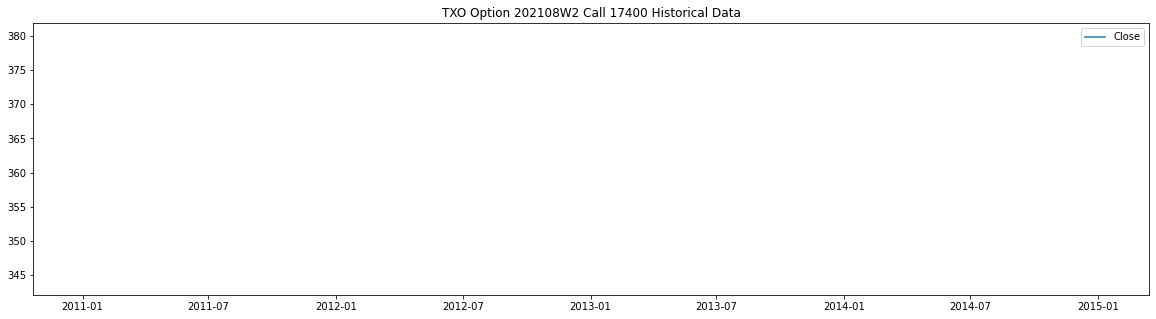

In [34]:
fig = plt.figure(figsize = (20, 5))
plt.title('TXO Option 202108W2 Call 17400 Historical Data')

plt.plot(txo_17400_c['交易日期'], txo_17400_c['收盤價'])

plt.legend(['Close'])

In [43]:
tx_df=pd.read_excel("./tx.xlsx")


In [45]:
tx_df

,時間,開盤價,最高價,最低價,收盤價,UB2.00,BBandMA20,LB2.00,成交量,MA5,...,投信持股比例,買賣超(元).2,自營商累計買賣超(元),買進(元).3,賣出(元).3,自營商持股比例,買賣超(元).3,主力累計買賣超(元),買進(元).4,賣出(元).4
0,2011-03-07,8769.87,8769.87,8706.38,8713.79,9087.17,8756.26,8425.36,997.98,1238.76,...,NaN,-2.16億,474億,38.3億,40.5億,NaN,NaN,NaN,NaN,NaN
1,2011-03-08,8692.10,8768.31,8692.10,8747.75,9015.05,8736.38,8457.72,1123.76,1206.47,...,NaN,7609萬,475億,40.9億,40.1億,NaN,NaN,NaN,NaN,NaN
2,2011-03-09,8810.35,8824.41,8730.74,8750.02,8937.97,8718.31,8498.66,1206.29,1208.95,...,NaN,2.21億,477億,42.4億,40.1億,NaN,NaN,NaN,NaN,NaN
3,2011-03-10,8754.41,8754.41,8635.75,8642.90,8877.36,8700.12,8522.87,1184.87,1182.37,...,NaN,-5.36億,472億,36.9億,42.3億,NaN,NaN,NaN,NaN,NaN
4,2011-03-11,8566.91,8593.71,8513.51,8567.82,8861.23,8686.68,8512.12,1125.78,1127.73,...,NaN,-8.09億,464億,41.2億,49.3億,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2817,2022-08-19,15394.36,15458.45,15346.26,15408.78,15557.31,15070.31,14583.32,2225.83,2182.10,...,NaN,9.56億,-5639億,78.5億,68.9億,NaN,-31億,-254億,66億,97億
2818,2022-08-22,15375.20,15375.20,15229.36,15245.14,15574.36,15085.76,14597.16,2041.46,2114.63,...,NaN,-6.90億,-5645億,77.9億,84.8億,NaN,-131億,-386億,48億,180億
2819,2022-08-23,15225.17,15225.17,15086.43,15095.89,15571.75,15100.21,14628.67,1743.04,2039.60,...,NaN,-25.4億,-5671億,70.5億,95.8億,NaN,-152億,-538億,41億,193億
2820,2022-08-24,15112.15,15183.96,15053.52,15069.19,15572.29,15107.59,14642.89,1810.63,1964.13,...,NaN,-17.0億,-5688億,68.7億,85.7億,NaN,-82億,-621億,48億,131億


In [50]:
tx_open = tx_df.loc[tx_df['時間']=='2022-08-25']['開盤價']

In [52]:
a=int(round(tx_open,-2))

In [53]:
get_options(df, '202208W1', '買權', a, '一般')

,交易日期,契約,到期月份(週別),履約價,買賣權,開盤價,最高價,最低價,收盤價,成交量,結算價,未沖銷契約數,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,是否因訊息面暫停交易,交易時段,漲跌價,漲跌%
100,2022-08-01 00:00:00,TXO,202208W1,15100.0,買權,40.5,42.0,16.5,17.5,18569.0,17.5,9600.0,17.5,18.5,112.0,16.5,,一般,-37.5,-68.18%
1506,2022-08-02 00:00:00,TXO,202208W1,15100.0,買權,6.8,7.2,1.0,1.8,12828.0,1.8,9572.0,1.6,1.9,112.0,1.0,,一般,-15.7,-89.71%
2922,2022-08-03 00:00:00,TXO,202208W1,15100.0,買權,0.3,1.0,0.1,0.1,2344.0,0.0,8516.0,0.1,0.2,112.0,0.1,,一般,-1.7,-94.44%
